# Importing Necessary Library Files & Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 10, 6

In [2]:
import investpy

search_result = investpy.search_quotes(text='Platinum Futures', products=['commodities'],
                                       countries=['united states'], n_results=1)
print(search_result)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
{"id_": 8910, "name": "Platinum Futures", "symbol": "PL", "country": null, "tag": "/commodities/platinum", "pair_type": "commodities", "exchange": "NYMEX"}


In [3]:
recent_data = search_result.retrieve_recent_data()
historical_data = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='01/01/2020')
information = search_result.retrieve_information()
default_currency = search_result.retrieve_currency()
technical_indicators = search_result.retrieve_technical_indicators(interval='daily')

In [4]:
data=historical_data[['Close']]

In [5]:
data

,Close
Date,
2019-01-01,800.60
2019-01-02,798.70
2019-01-03,804.00
2019-01-04,826.70
2019-01-06,824.85
...,...
2019-12-27,947.35
2019-12-29,956.00
2019-12-30,964.75


# Visualizing Dataset

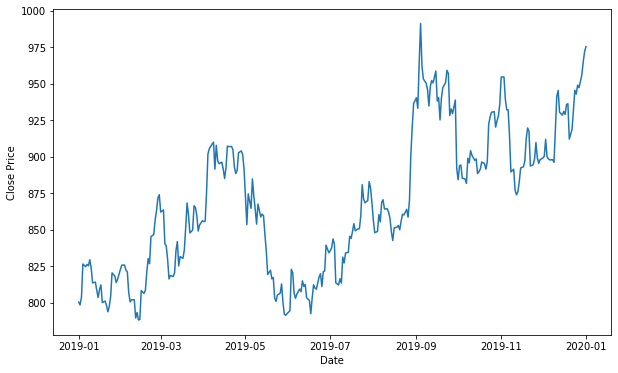

In [6]:
plt.xlabel("Date") 
plt.ylabel("Close Price") 
plt.plot(data)

# Rolling Statistics

In [7]:
rolmean = data.rolling (window=12).mean() 
rolstd = data.rolling(window=12).std() 
print(rolmean, rolstd)

                 Close
Date                  
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-06         NaN
...                ...
2019-12-27  934.125000
2019-12-29  936.412500
2019-12-30  939.212500
2019-12-31  942.783333
2020-01-01  946.091667

[314 rows x 1 columns]                 Close
Date                 
2019-01-01        NaN
2019-01-02        NaN
2019-01-03        NaN
2019-01-04        NaN
2019-01-06        NaN
...               ...
2019-12-27  11.290090
2019-12-29  12.744948
2019-12-30  14.978805
2019-12-31  17.268460
2020-01-01  19.471352

[314 rows x 1 columns]


# Plot rolling statistics

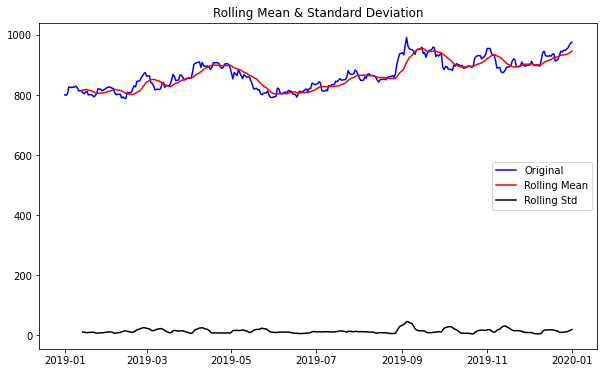

In [8]:
orig = plt.plot(data, color='blue',label='Original') 
mean = plt.plot(rolmean, color='red', label='Rolling Mean') 
std = plt.plot(rolstd, color='black', label='Rolling Std') 
plt.legend (loc='best') 
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Performing Dickey-Fuller test

In [9]:
from statsmodels.tsa.stattools import adfuller 

print('Results of Dickey-Fuller Test: ') 
dftest = adfuller(data['Close'], autolag='AIC') 

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']) 
for key, value in dftest[4].items(): 
  dfoutput['Critical Value (%s) '%key] = value 
print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results of Dickey-Fuller Test: 
Test Statistic                  -1.753153
p-value                          0.403955
#Lags Used                       1.000000
Number of Observations Used    312.000000
Critical Value (1%)             -3.451484
Critical Value (5%)             -2.870849
Critical Value (10%)            -2.571730
dtype: float64


# Estimating trend 

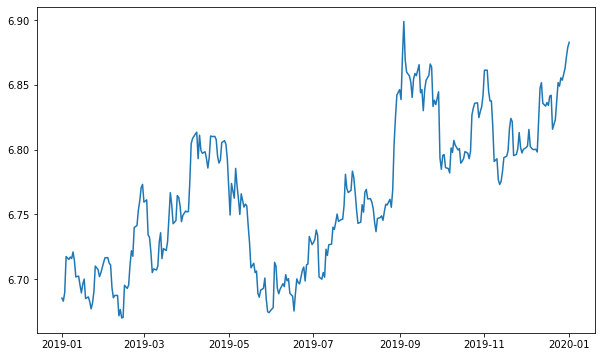

In [10]:
data_logScale = np.log(data) 
plt.plot(data_logScale)

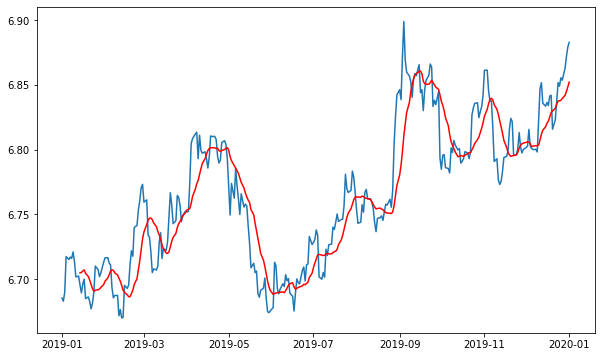

In [11]:
movingAverage = data_logScale.rolling(window=12).mean() 
movingSTD = data_logScale.rolling(window=12).std() 
plt.plot(data_logScale) 
plt.plot(movingAverage, color='red')

# Removing Nan Values

In [12]:
datasetLogScaleMinusMovingAverage = data_logScale - movingAverage 
datasetLogScaleMinusMovingAverage.head(12) 

 
datasetLogScaleMinusMovingAverage.dropna(inplace=True) 
datasetLogScaleMinusMovingAverage.head(10)

,Close
Date,
2019-01-14,-0.009415
2019-01-15,-0.015825
2019-01-16,-0.010048
2019-01-17,-0.007153
2019-01-18,-0.019455
2019-01-20,-0.015735
2019-01-21,-0.016493
2019-01-22,-0.018845
2019-01-23,-0.011095


# Stationarity Function

In [13]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries): 
  
  #Determing rolling statistics 
  movingAverage = timeseries.rolling(window=12).mean() 
  movingSTD = timeseries.rolling(window=12).std() 
  
  #Plot rolling statistics: 
  orig = plt.plot(timeseries, color='blue',label='Original') 
  mean = plt.plot(movingAverage, color="red", label='Rolling Mean') 
  std = plt.plot(movingSTD, color= 'black', label= 'Rolling Std') 
  plt.legend(loc='best') 
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False) 
  
  #Perform Dickey-Fuller test: 
  print('Results of Dickey-Fuller Test :') 
  dftest = adfuller(timeseries ['Close'], autolag='AIC') 
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']) 
  
  for key, value in dftest [4].items(): 
    dfoutput['critical Value (%s) '%key] = value 
  print(dfoutput)

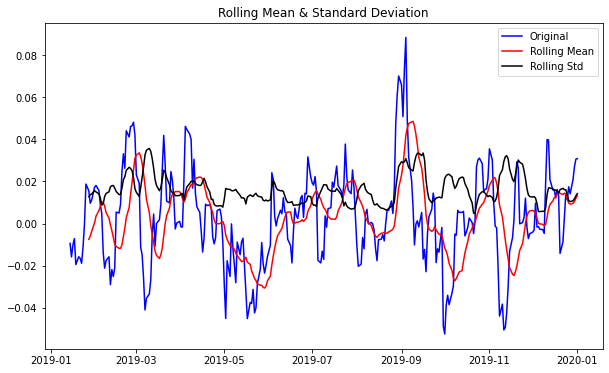

Results of Dickey-Fuller Test :
Test Statistic                -5.982999e+00
p-value                        1.819720e-07
#Lags Used                     6.000000e+00
Number of Observations Used    2.960000e+02
critical Value (1%)           -3.452637e+00
critical Value (5%)           -2.871354e+00
critical Value (10%)          -2.571999e+00
dtype: float64


In [14]:
test_stationarity (datasetLogScaleMinusMovingAverage)

# Exponential Decay Weighted

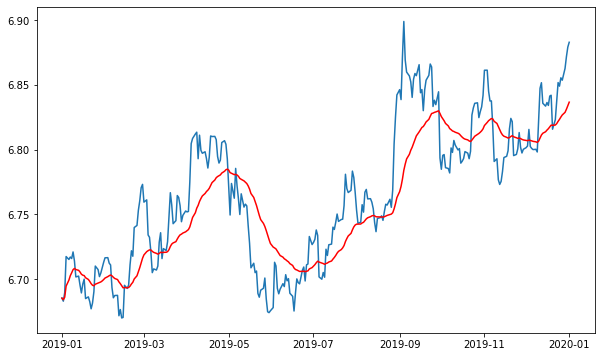

In [15]:
exponentialDecayweightedAverage= data_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean() 
plt.plot(data_logScale) 
plt.plot(exponentialDecayweightedAverage, color='red')

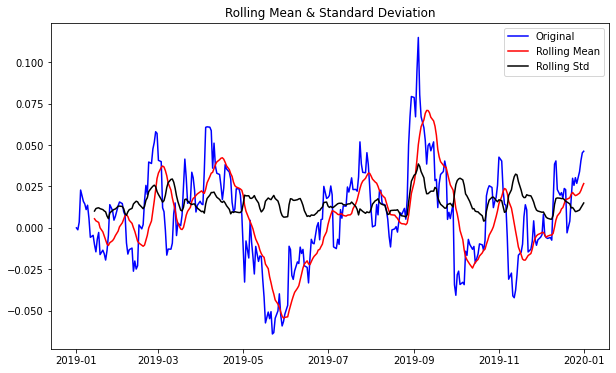

Results of Dickey-Fuller Test :
Test Statistic                  -3.752266
p-value                          0.003435
#Lags Used                       1.000000
Number of Observations Used    312.000000
critical Value (1%)             -3.451484
critical Value (5%)             -2.870849
critical Value (10%)            -2.571730
dtype: float64


In [16]:
datasetLogScaleMinusMovingExponentialDecayAverage = data_logScale - exponentialDecayweightedAverage 
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

# Log Differentiated Shifting

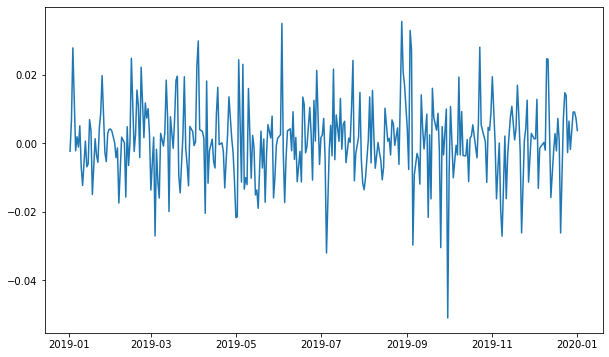

In [17]:
datasetLogDiffShifting = data_logScale - data_logScale.shift() 
plt.plot(datasetLogDiffShifting)

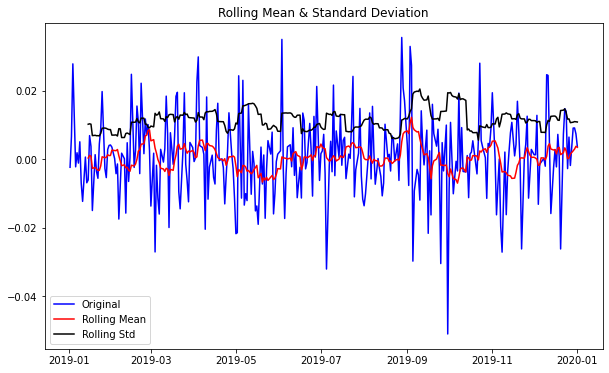

Results of Dickey-Fuller Test :
Test Statistic                -1.614273e+01
p-value                        4.657505e-29
#Lags Used                     0.000000e+00
Number of Observations Used    3.120000e+02
critical Value (1%)           -3.451484e+00
critical Value (5%)           -2.870849e+00
critical Value (10%)          -2.571730e+00
dtype: float64


In [18]:
datasetLogDiffShifting.dropna(inplace=True) 
test_stationarity(datasetLogDiffShifting)

# Decomposition of log scaled dataset

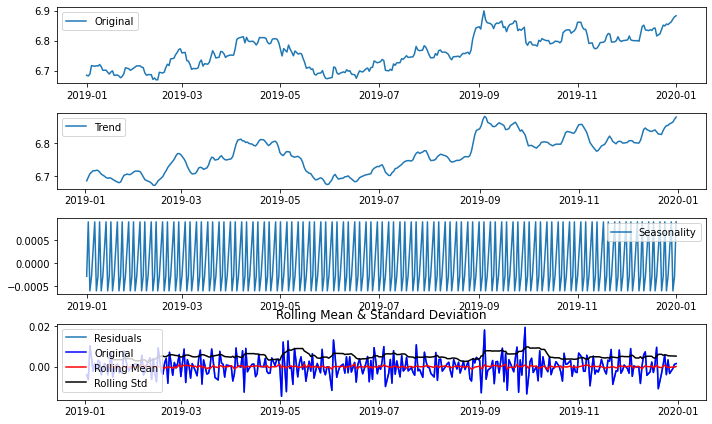

Results of Dickey-Fuller Test :
Test Statistic                -9.053618e+00
p-value                        4.766286e-15
#Lags Used                     1.100000e+01
Number of Observations Used    3.000000e+02
critical Value (1%)           -3.452337e+00
critical Value (5%)           -2.871223e+00
critical Value (10%)          -2.571929e+00
dtype: float64


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(data_logScale, freq=3) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(data_logScale, label='Original') 
plt.legend(loc='best') 
plt.subplot (412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal, label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout()

decomposedLogData = residual 
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


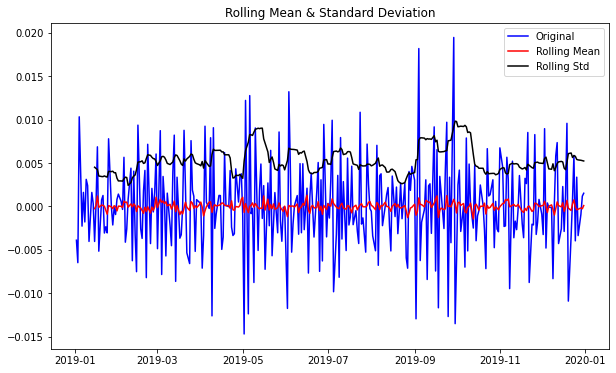

Results of Dickey-Fuller Test :
Test Statistic                -9.053618e+00
p-value                        4.766286e-15
#Lags Used                     1.100000e+01
Number of Observations Used    3.000000e+02
critical Value (1%)           -3.452337e+00
critical Value (5%)           -2.871223e+00
critical Value (10%)          -2.571929e+00
dtype: float64


In [20]:
decomposedLogData = residual 
decomposedLogData.dropna(inplace=True) 
test_stationarity(decomposedLogData )

# Autocorrelation & Partial Autocorrelation Function

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


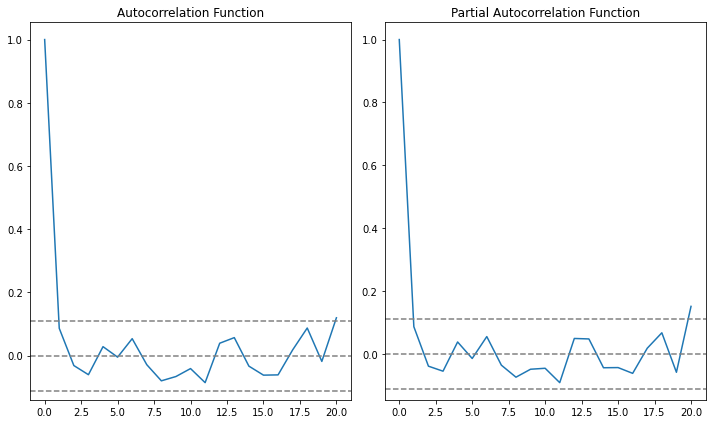

In [21]:
#ACF and PACF plots: 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags=20) 
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method="ols") 

#PLot ACF: 
plt.subplot(121) 
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray') 
plt.title('Autocorrelation Function')            

#PLot PACF: 
plt.subplot(122) 
plt.plot(lag_pacf) 
plt.axhline (y=0, linestyle='--',color='gray') 
plt.axhline (y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function') 
plt.tight_layout()

# Autoregressive, Moving Average, ARIMA Models

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


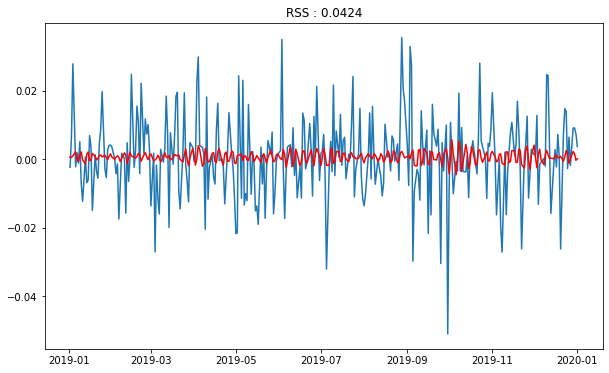

In [22]:
from statsmodels.tsa.arima_model import ARIMA 

#Auto Regressive MODEL 
model= ARIMA(data_logScale, order=(2, 1, 2)) 
results_AR = model.fit(disp=-1) 
plt.plot(datasetLogDiffShifting) 
plt.plot(results_AR.fittedvalues, color="red") 
plt.title('RSS : %.4f' % sum((results_AR.fittedvalues-datasetLogDiffShifting['Close'])**2)) 
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


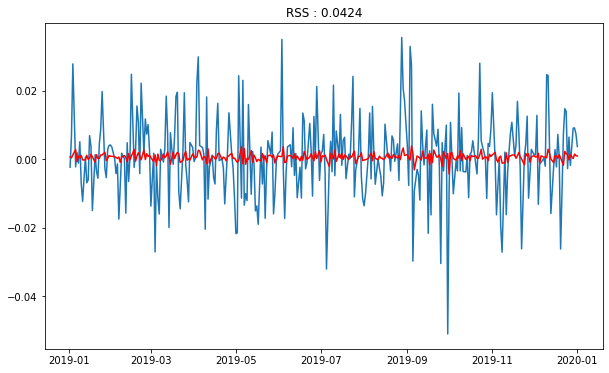

In [23]:
#Moving Average MODEL 
model= ARIMA(data_logScale, order=(2, 1, 0)) 
results_MA = model.fit(disp=-1) 
plt.plot(datasetLogDiffShifting) 
plt.plot(results_MA.fittedvalues, color="red") 
plt.title('RSS : %.4f' % sum((results_AR.fittedvalues-datasetLogDiffShifting['Close'])**2)) 
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


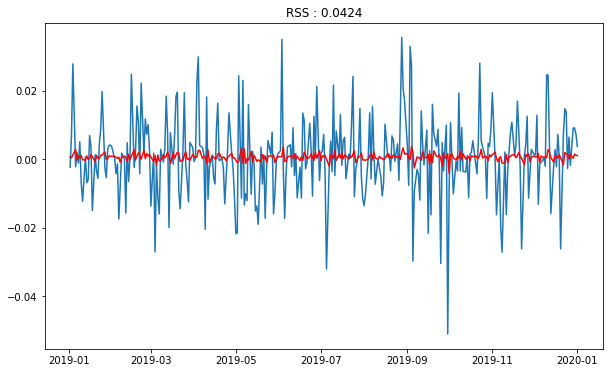

In [24]:
#ARIMA MODEL 
model= ARIMA(data_logScale, order=(0, 1, 2)) 
results_ARIMA = model.fit(disp=-1) 
plt.plot(datasetLogDiffShifting) 
plt.plot(results_ARIMA.fittedvalues, color="red") 
plt.title('RSS : %.4f' % sum((results_AR.fittedvalues-datasetLogDiffShifting['Close'])**2)) 
print('Plotting AR model')

# Predictions

In [25]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True) 
print (predictions_ARIMA_diff.head())

Date
2019-01-02    0.000631
2019-01-03    0.000376
2019-01-04    0.001228
2019-01-06    0.002824
2019-01-07   -0.000309
dtype: float64


In [26]:
#Convert to cumulative sum 
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum() 
print (predictions_ARIMA_diff_cumsum.head()) 

Date
2019-01-02    0.000631
2019-01-03    0.001007
2019-01-04    0.002235
2019-01-06    0.005059
2019-01-07    0.004750
dtype: float64


In [27]:
predictions_ARIMA_log = pd.Series(data_logScale['Close'].iloc[0],  index=data_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0) 
predictions_ARIMA_log.head() 

Date
2019-01-01    6.685361
2019-01-02    6.685992
2019-01-03    6.686369
2019-01-04    6.687596
2019-01-06    6.690421
dtype: float64

# Graphical Predictions

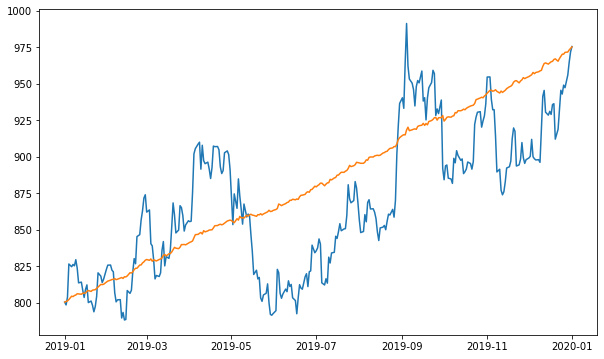

In [28]:
predictions_ARIMA = np.exp(predictions_ARIMA_log) 
plt.plot(data) 
plt.plot(predictions_ARIMA)

In [29]:
data_logScale

,Close
Date,
2019-01-01,6.685361
2019-01-02,6.682985
2019-01-03,6.689599
2019-01-04,6.717442
2019-01-06,6.715202
...,...
2019-12-27,6.853669
2019-12-29,6.862758
2019-12-30,6.871869


# Confidence Interval Plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


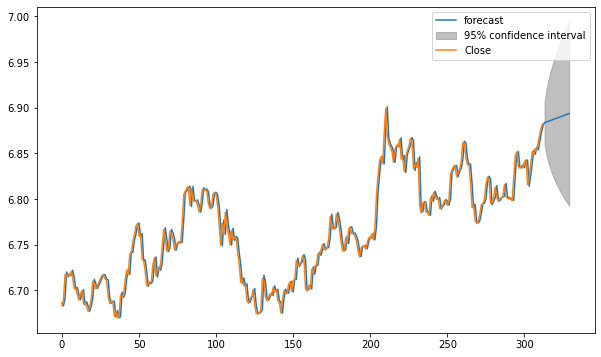

In [34]:
import matplotlib.pyplot as plt
results_ARIMA.plot_predict(1,330) 
x = results_ARIMA.forecast(steps=120)

# Predicted Values in Log Scaling

In [36]:
x[1]

array([0.01170337, 0.01728459, 0.02133067, 0.02472322, 0.0277034 ,
       0.03039274, 0.03286273, 0.03515963, 0.03731541, 0.03935328,
       0.04129069, 0.04314118, 0.0449155 , 0.04662234, 0.04826886,
       0.04986104, 0.05140393, 0.05290184, 0.05435848, 0.0557771 ,
       0.05716053, 0.05851125, 0.05983149, 0.06112321, 0.0623882 ,
       0.06362805, 0.06484419, 0.06603794, 0.06721049, 0.06836293,
       0.06949626, 0.07061141, 0.07170921, 0.07279047, 0.07385589,
       0.07490616, 0.07594191, 0.07696372, 0.07797214, 0.07896768,
       0.07995083, 0.08092203, 0.08188172, 0.08283029, 0.08376811,
       0.08469556, 0.08561295, 0.08652062, 0.08741887, 0.08830798,
       0.08918823, 0.09005987, 0.09092316, 0.09177833, 0.0926256 ,
       0.09346519, 0.09429731, 0.09512215, 0.0959399 , 0.09675073,
       0.09755483, 0.09835235, 0.09914346, 0.0999283 , 0.10070703,
       0.10147979, 0.1022467 , 0.1030079 , 0.10376352, 0.10451368,
       0.10525849, 0.10599806, 0.10673252, 0.10746195, 0.10818